# *Contents*
____________________________

## 1. Data import
## 2. Preprocessing Steps
###   - Outlier Treatment (Capping method)
###   - Feature Creation
###   - Normal Distribution Checking
###   - Correlation Check
###   - WOE Transformation
## 3. Train Test Splitting
## 4. Model Building
## 5. Model Optimization
## 6. Stacking Classifier
## 7. Univariate Analysis

_________________________________________

# Data Import

In [70]:
# For Preprocessing part
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor

# For Modelling part
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from mlxtend.classifier import StackingCVClassifier

# For Evaluation and Tuning part
from sklearn.metrics import roc_auc_score, classification_report, confusion_matrix, roc_curve, precision_recall_curve
from sklearn.model_selection import cross_val_score
import optuna

In [2]:
# import data with reading the file
data = pd.read_excel('default_of_credit_card_clients.xls')

In [3]:
# displaying the data
pd.set_option('display.max_columns', None)
data
# default column will be dependent or target variable

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,1,20000,female,university,married,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,2,120000,female,university,single,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,female,university,single,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,female,university,married,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,male,university,married,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,male,high school,married,39,0,0,0,0,0,0,188948,192815,208365,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,150000,male,high school,single,43,-1,-1,-1,-1,0,0,1683,1828,3502,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,30000,male,university,single,37,4,3,2,-1,0,0,3565,3356,2758,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,male,high school,married,41,1,-1,0,0,0,-1,-1645,78379,76304,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [4]:
# showing data in terms of statistical description
data.describe(include = 'all')

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
count,30000.000000,30000.000000,30000,30000,30000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
unique,NaN,NaN,2,5,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,female,university,single,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,18112,14030,15964,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,15000.500000,167484.322667,NaN,NaN,NaN,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,NaN,NaN,NaN,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,NaN,NaN,NaN,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,NaN,NaN,NaN,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,NaN,NaN,NaN,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,NaN,NaN,NaN,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000


# Preprocessing

In [5]:
# checking null values
data.isnull().sum()

ID           0
LIMIT_BAL    0
SEX          0
EDUCATION    0
MARRIAGE     0
AGE          0
PAY_0        0
PAY_2        0
PAY_3        0
PAY_4        0
PAY_5        0
PAY_6        0
BILL_AMT1    0
BILL_AMT2    0
BILL_AMT3    0
BILL_AMT4    0
BILL_AMT5    0
BILL_AMT6    0
PAY_AMT1     0
PAY_AMT2     0
PAY_AMT3     0
PAY_AMT4     0
PAY_AMT5     0
PAY_AMT6     0
default      0
dtype: int64

In [6]:
# checking duplicated rows if any
data.duplicated().sum()

0

In [7]:
# dropping unnecessary column
data.drop(columns = ['ID'], inplace = True)

# copying the data for the next models
df = data.copy()

## Outlier Treatment (Capping Method)

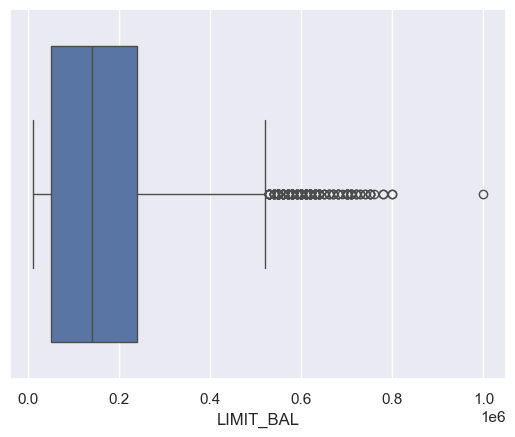

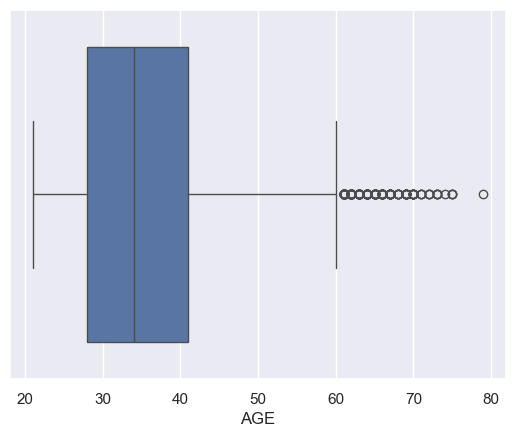

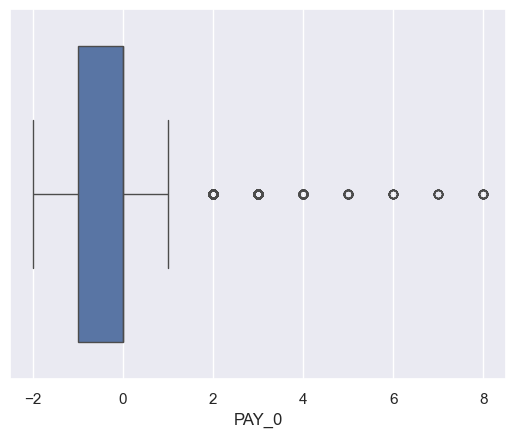

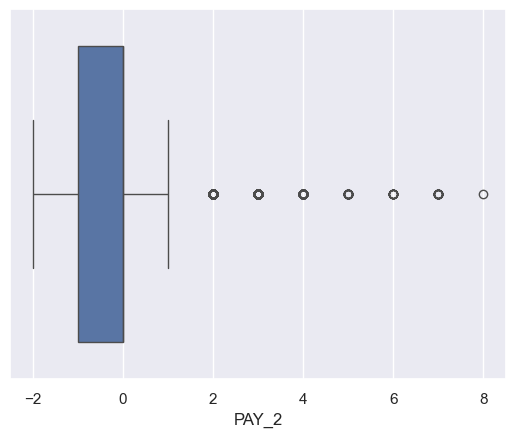

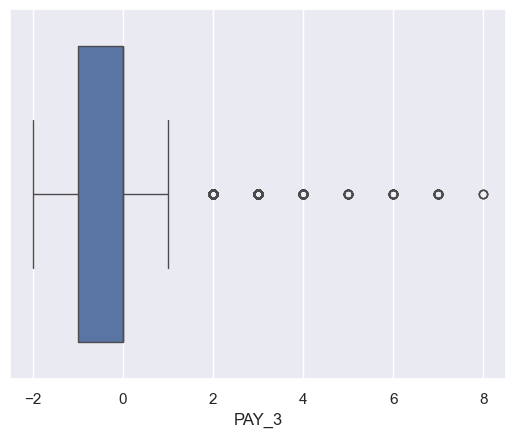

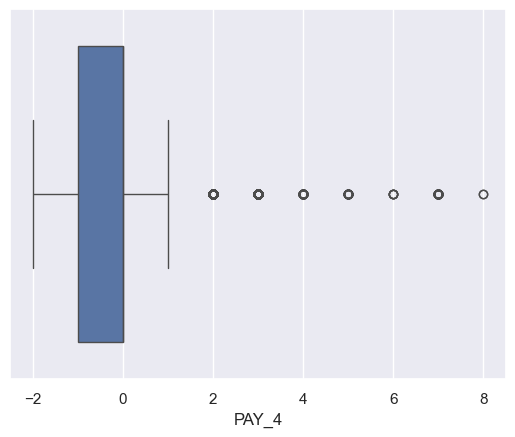

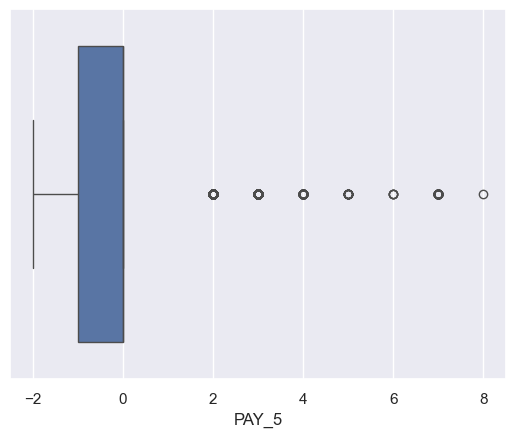

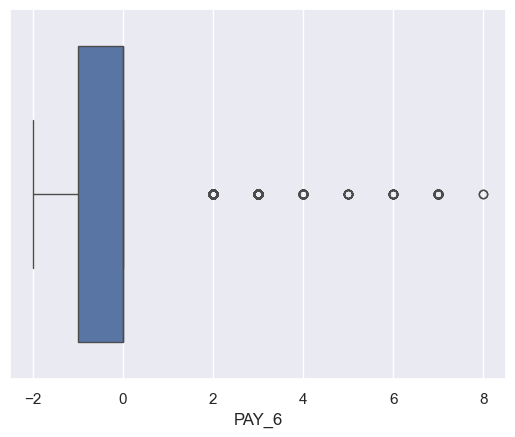

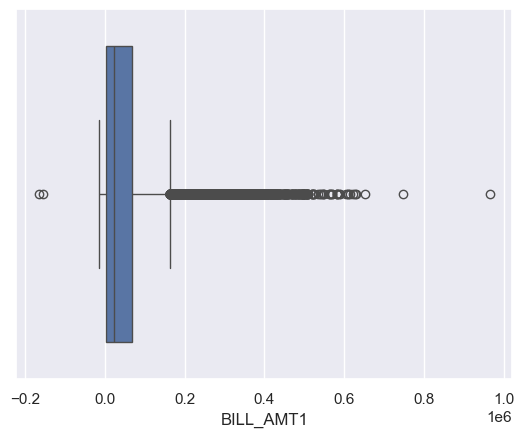

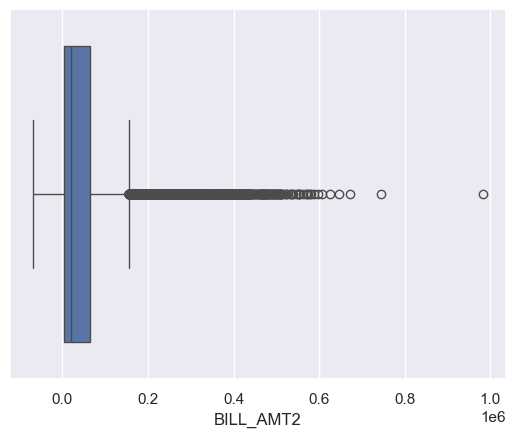

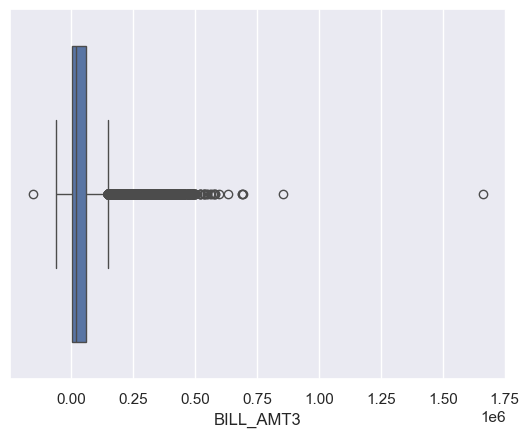

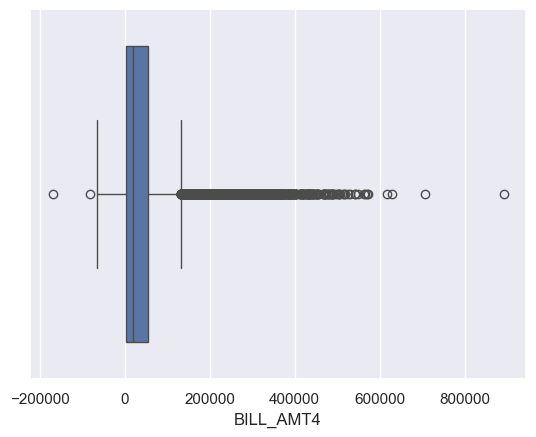

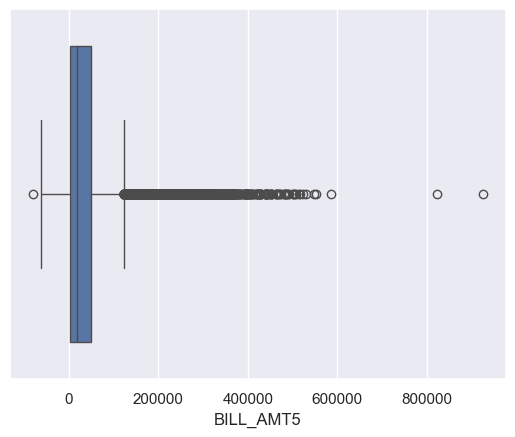

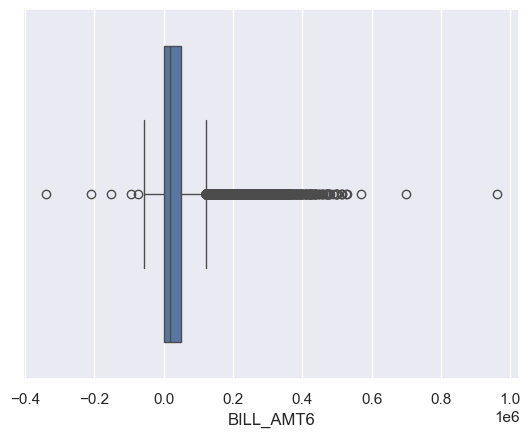

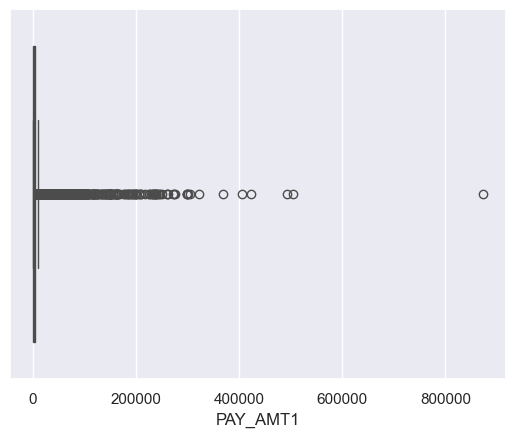

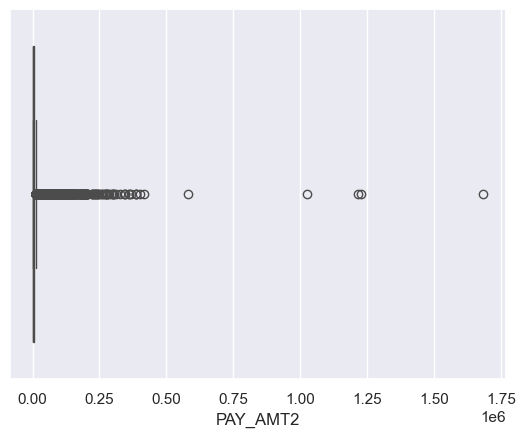

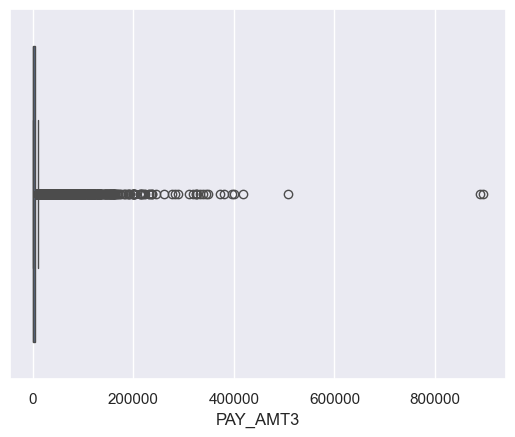

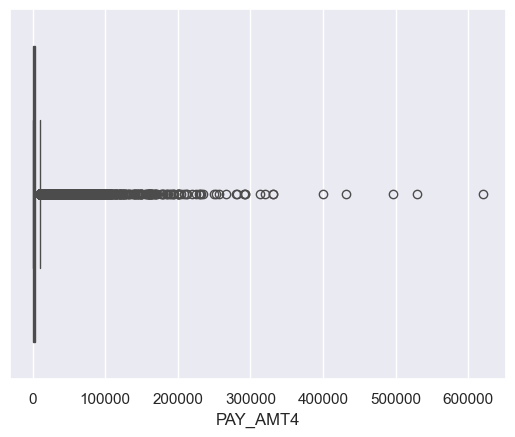

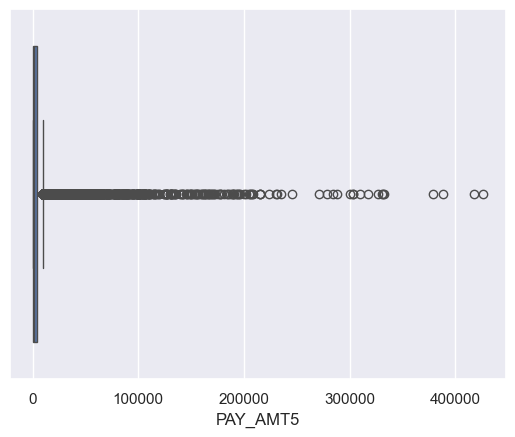

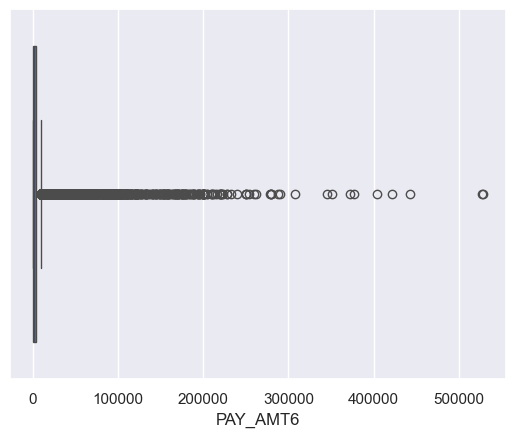

In [8]:
# plotting boxplots to observe outliers if any
for column in data.columns:
    if data[column].dtypes != object and column != 'default':
        sns.boxplot(data = data, x = column)
        plt.show()

In [9]:
q1 = data.quantile(0.25, numeric_only = True)
q3 = data.quantile(0.75, numeric_only = True)

IQR = q3 - q1
Upper = q3 + IQR * 1.5
Lower = q1 - IQR * 1.5

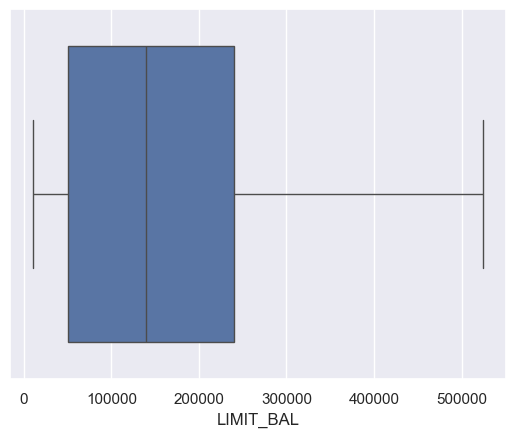

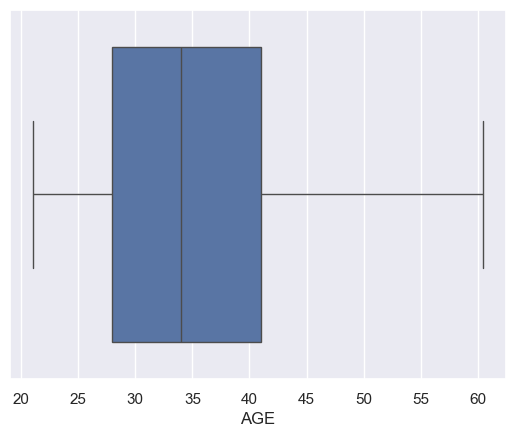

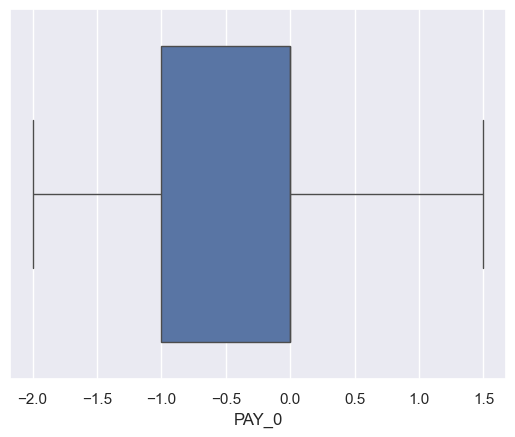

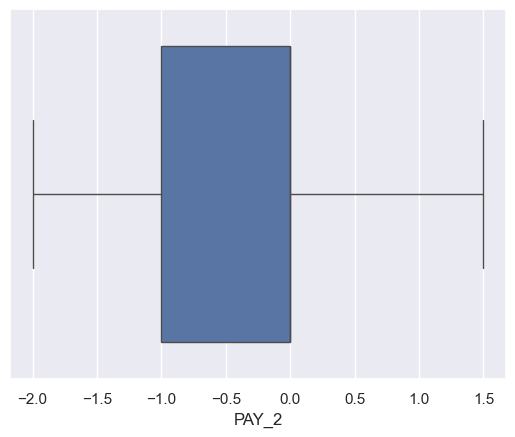

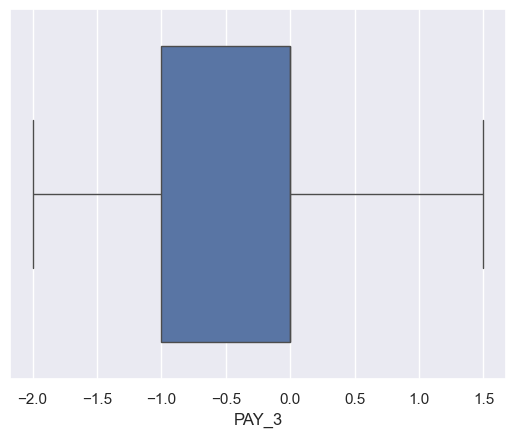

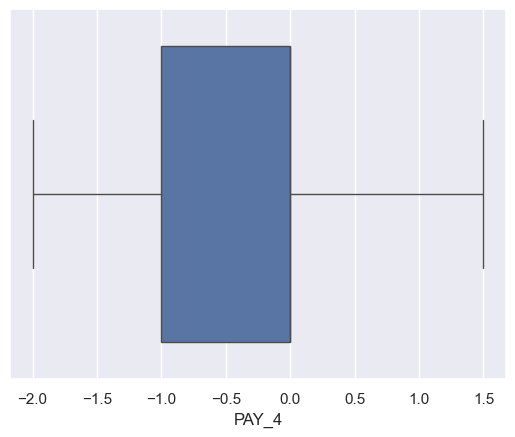

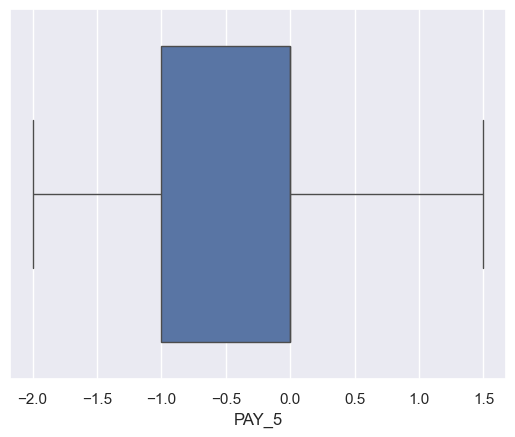

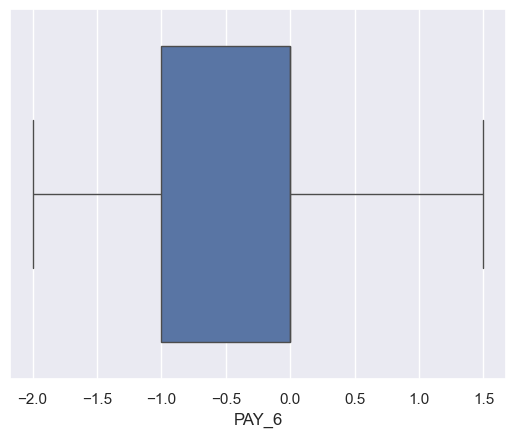

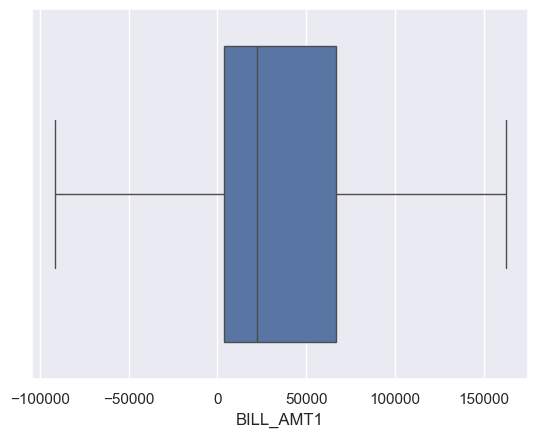

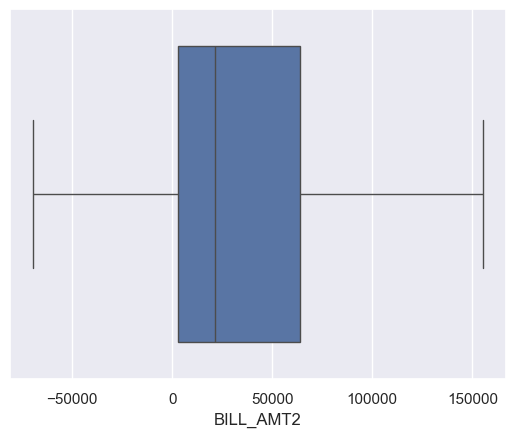

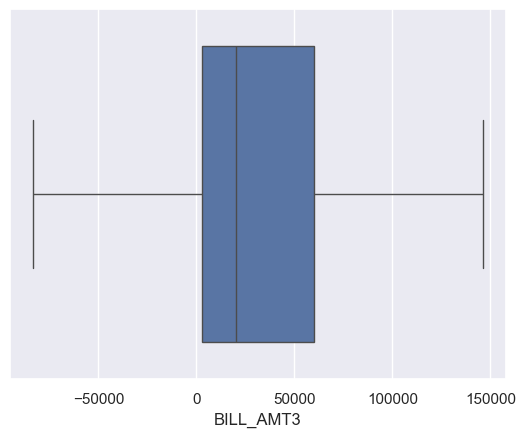

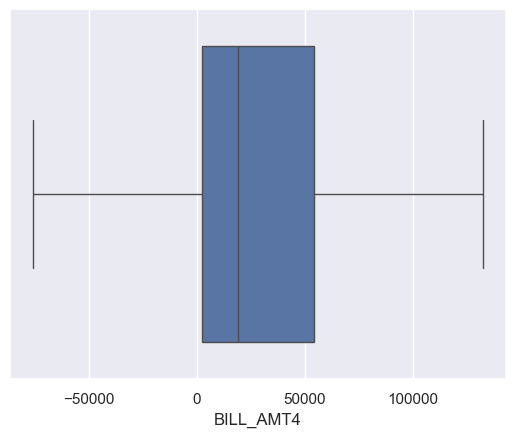

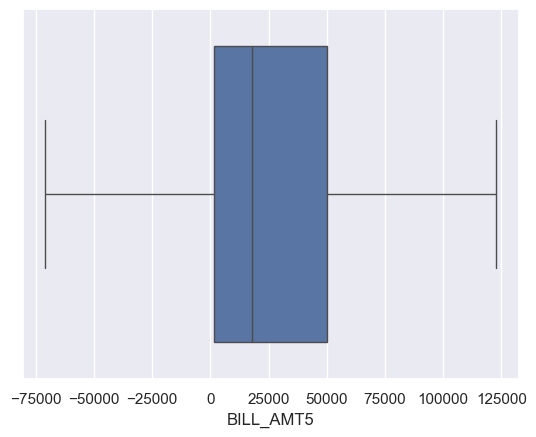

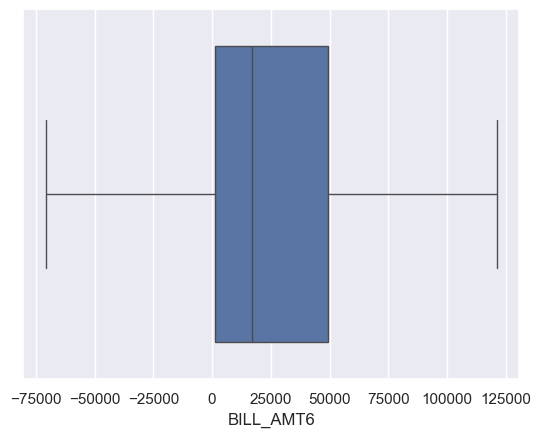

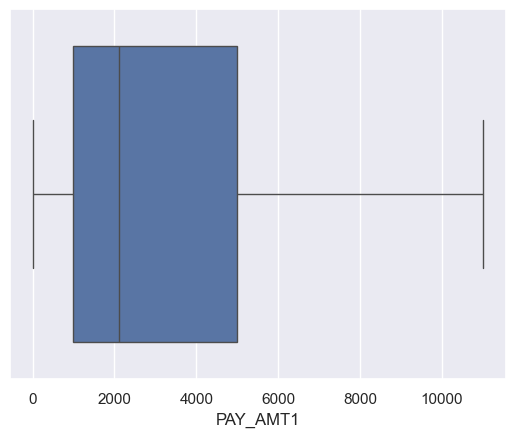

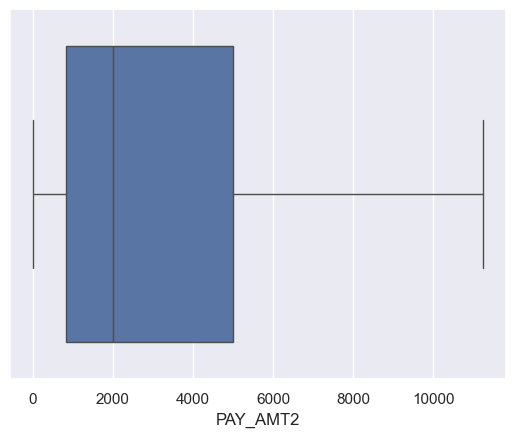

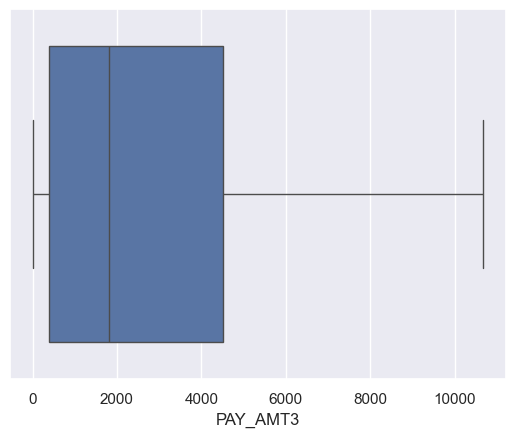

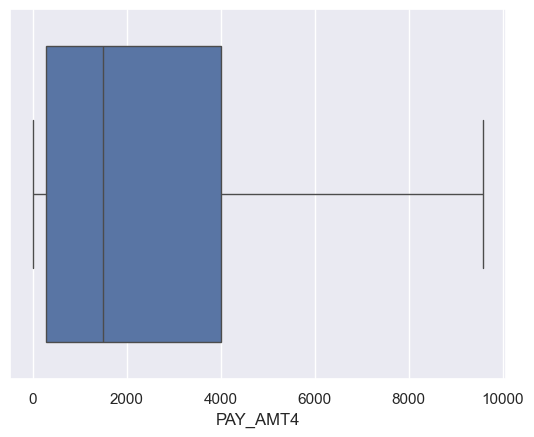

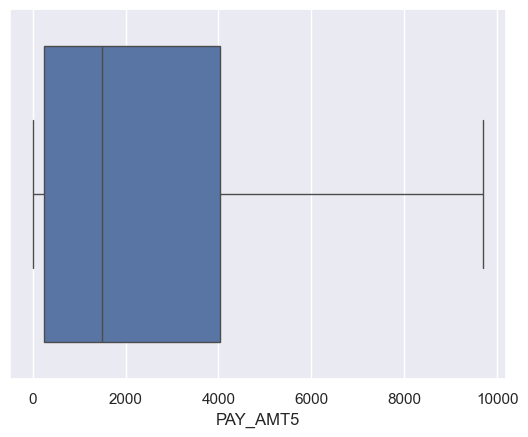

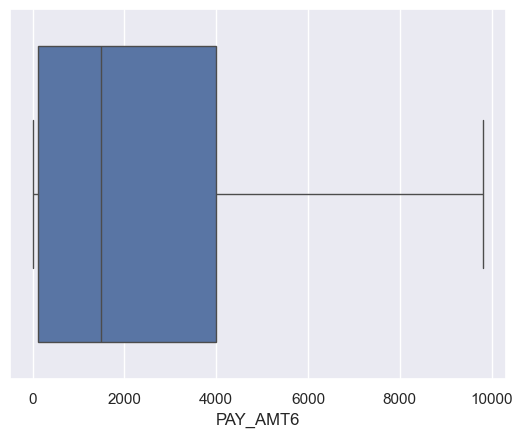

In [10]:
# All outliers has been replace with Upper and Lower boundries
for column in data.columns:
    if data[column].dtypes != object and column != 'default':
        data[column] = np.where(data[column] > Upper[column], Upper[column], data[column])
        data[column] = np.where(data[column] < Lower[column], Lower[column], data[column])
        sns.boxplot(data = data, x = column)
        plt.show()

# Feature Creation

In [11]:
data.head(2)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,20000.0,female,university,married,24.0,1.5,1.5,-1.0,-1.0,-2.0,-2.0,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,120000.0,female,university,single,26.0,-1.0,1.5,0.0,0.0,0.0,1.5,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1


In [12]:
statistics = ['mean', 'sum', 'min', 'max']

In [13]:
# creating new columns using relationship between Education and Limit_Bal columns in terms of statistical analysis
for i in statistics:
    result = data.groupby(['EDUCATION']).agg({'LIMIT_BAL': [i]})
    result.columns = [f'LIMIT_BAL_{i}_by_EDUCATION']
    result.reset_index(inplace=True)
    
    data = pd.merge(data, result, on='EDUCATION', how='left')

# creating new columns using relationship between Marriage and Limit_Bal columns in terms of statistical analysis
for i in statistics:
    result = data.groupby(['MARRIAGE']).agg({'LIMIT_BAL': [i]})
    result.columns = [f'LIMIT_BAL_{i}_by_MARRIAGE']
    result.reset_index(inplace=True)
    
    data = pd.merge(data, result, on='MARRIAGE', how='left')

In [14]:
for column in data.columns[-8:]:
    print(data[column].value_counts())
    print()

LIMIT_BAL_mean_by_EDUCATION
146691.803279    14030
212167.217761    10585
126203.514338     4917
179660.792952      454
217142.857143       14
Name: count, dtype: int64

LIMIT_BAL_sum_by_EDUCATION
2.058086e+09    14030
2.245790e+09    10585
6.205427e+08     4917
8.156600e+07      454
3.040000e+06       14
Name: count, dtype: int64

LIMIT_BAL_min_by_EDUCATION
10000.0    29986
50000.0       14
Name: count, dtype: int64

LIMIT_BAL_max_by_EDUCATION
525000.0    29986
360000.0       14
Name: count, dtype: int64

LIMIT_BAL_mean_by_MARRIAGE
155948.551741    15964
181609.341826    13659
103076.923077      377
Name: count, dtype: int64

LIMIT_BAL_sum_by_MARRIAGE
2.489563e+09    15964
2.480602e+09    13659
3.886000e+07      377
Name: count, dtype: int64

LIMIT_BAL_min_by_MARRIAGE
10000.0    30000
Name: count, dtype: int64

LIMIT_BAL_max_by_MARRIAGE
525000.0    29623
500000.0      377
Name: count, dtype: int64



In [15]:
# since this column has one unique value
data.drop(columns = ['LIMIT_BAL_min_by_MARRIAGE'], inplace = True)

In [16]:
# after creating new columns, the last version of data
data

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default,LIMIT_BAL_mean_by_EDUCATION,LIMIT_BAL_sum_by_EDUCATION,LIMIT_BAL_min_by_EDUCATION,LIMIT_BAL_max_by_EDUCATION,LIMIT_BAL_mean_by_MARRIAGE,LIMIT_BAL_sum_by_MARRIAGE,LIMIT_BAL_max_by_MARRIAGE
0,20000.0,female,university,married,24.0,1.5,1.5,-1.0,-1.0,-2.0,-2.0,3913.000,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1,146691.803279,2.058086e+09,10000.0,525000.0,181609.341826,2.480602e+09,525000.0
1,120000.0,female,university,single,26.0,-1.0,1.5,0.0,0.0,0.0,1.5,2682.000,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1,146691.803279,2.058086e+09,10000.0,525000.0,155948.551741,2.489563e+09,525000.0
2,90000.0,female,university,single,34.0,0.0,0.0,0.0,0.0,0.0,0.0,29239.000,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0,146691.803279,2.058086e+09,10000.0,525000.0,155948.551741,2.489563e+09,525000.0
3,50000.0,female,university,married,37.0,0.0,0.0,0.0,0.0,0.0,0.0,46990.000,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0,146691.803279,2.058086e+09,10000.0,525000.0,181609.341826,2.480602e+09,525000.0
4,50000.0,male,university,married,57.0,-1.0,0.0,-1.0,0.0,0.0,0.0,8617.000,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,11250.5,10000.0,9000.0,689.0,679.0,0,146691.803279,2.058086e+09,10000.0,525000.0,181609.341826,2.480602e+09,525000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000.0,male,high school,married,39.0,0.0,0.0,0.0,0.0,0.0,0.0,162389.375,155538.5,146412.5,88004.0,31237.0,15980.0,8500.0,11250.5,5003.0,3047.0,5000.0,1000.0,0,126203.514338,6.205427e+08,10000.0,525000.0,181609.341826,2.480602e+09,525000.0
29996,150000.0,male,high school,single,43.0,-1.0,-1.0,-1.0,-1.0,0.0,0.0,1683.000,1828.0,3502.0,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0,126203.514338,6.205427e+08,10000.0,525000.0,155948.551741,2.489563e+09,525000.0
29997,30000.0,male,university,single,37.0,1.5,1.5,1.5,-1.0,0.0,0.0,3565.000,3356.0,2758.0,20878.0,20582.0,19357.0,0.0,0.0,10677.5,4200.0,2000.0,3100.0,1,146691.803279,2.058086e+09,10000.0,525000.0,155948.551741,2.489563e+09,525000.0
29998,80000.0,male,high school,married,41.0,1.0,-1.0,0.0,0.0,0.0,-1.0,-1645.000,78379.0,76304.0,52774.0,11855.0,48944.0,11015.0,3409.0,1178.0,1926.0,9700.0,1804.0,1,126203.514338,6.205427e+08,10000.0,525000.0,181609.341826,2.480602e+09,525000.0


## Normal Distribution Checking

In [17]:
# Using Smirnov Test, we can determine whether data is normally distributed or not
for column in data.columns:
    
    if data[column].dtype in ['int64', 'float64']:
        
        kstest_statistic, kstest_p_value = stats.kstest(data[column], 'norm')
        # 'norm' inside indicates that the test is comparing the distribution of the data against a normal distribution
        
        print(f'Column: {column}')
        print(f'Kolmogorov-Smirnov Test:')
        print(f'Test Statistic: {kstest_statistic}')
        print(f'p-value: {kstest_p_value}')
        
        if kstest_p_value > 0.05:
            print('Data looks normally distributed')
            print()
        else:
            print('Data does not look normally distributed')
            print()

Column: LIMIT_BAL
Kolmogorov-Smirnov Test:
Test Statistic: 1.0
p-value: 0.0
Data does not look normally distributed

Column: AGE
Kolmogorov-Smirnov Test:
Test Statistic: 1.0
p-value: 0.0
Data does not look normally distributed

Column: PAY_0
Kolmogorov-Smirnov Test:
Test Statistic: 0.2727333333333334
p-value: 0.0
Data does not look normally distributed

Column: PAY_2
Kolmogorov-Smirnov Test:
Test Statistic: 0.35206666666666664
p-value: 0.0
Data does not look normally distributed

Column: PAY_3
Kolmogorov-Smirnov Test:
Test Statistic: 0.3595666666666667
p-value: 0.0
Data does not look normally distributed

Column: PAY_4
Kolmogorov-Smirnov Test:
Test Statistic: 0.383
p-value: 0.0
Data does not look normally distributed

Column: PAY_5
Kolmogorov-Smirnov Test:
Test Statistic: 0.4010666666666667
p-value: 0.0
Data does not look normally distributed

Column: PAY_6
Kolmogorov-Smirnov Test:
Test Statistic: 0.39736666666666665
p-value: 0.0
Data does not look normally distributed

Column: BILL_AM

## Correlation Check

In [18]:
# columns that have correlation with target more than 10% has been selected
def target_correlation(data, target, threshold=0.1):
    corr_matrix = data.corr(method='spearman', numeric_only = True)
    
    target_correlations = corr_matrix[target].abs() > threshold
    
    variables_explaining_target = target_correlations[target_correlations].index.tolist()

    variables_explaining_target.remove(target)
    
    result_explaining_target = pd.DataFrame(
    {'Variable': variables_explaining_target,
    'Correlation with Target': corr_matrix.loc[variables_explaining_target, target]})
    
    result_explaining_target.reset_index(drop=True, inplace=True)
    
    return result_explaining_target


target_result = target_correlation(data, 'default')

target_result

,Variable,Correlation with Target
0,LIMIT_BAL,-0.169584
1,PAY_0,0.292146
2,PAY_2,0.216689
3,PAY_3,0.194242
4,PAY_4,0.173036
5,PAY_5,0.158506
6,PAY_6,0.141810
7,PAY_AMT1,-0.159940
8,PAY_AMT2,-0.150441
9,PAY_AMT3,-0.138943


In [19]:
target_result.Variable.tolist()

['LIMIT_BAL',
 'PAY_0',
 'PAY_2',
 'PAY_3',
 'PAY_4',
 'PAY_5',
 'PAY_6',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6']

In [20]:
# the columns that have correlation with themselves more than 80% have been selected
def intercorrelation(data, target, threshold=0.8):
    corr_matrix = data.drop(columns=[target]).corr(method='spearman', numeric_only = True)
    
    highly_correlated_variables = (np.abs(corr_matrix) > threshold) & (corr_matrix != 1.0)
    
    independent_variable_pairs = np.where(highly_correlated_variables)
    
    correlated_pairs_set = set()
   
    for var1, var2 in zip(independent_variable_pairs[0], independent_variable_pairs[1]):

        if var1 < var2:
            correlated_pairs_set.add((corr_matrix.index[var1], corr_matrix.columns[var2]))
        else:
            correlated_pairs_set.add((corr_matrix.index[var2], corr_matrix.columns[var1]))
    
    result_intercorrelated_independent = pd.DataFrame(list(correlated_pairs_set), columns=['Variable 1', 'Variable 2'])
    
    return result_intercorrelated_independent

intercorrelated_result = intercorrelation(data, 'default')
intercorrelated_result

,Variable 1,Variable 2
0,PAY_4,PAY_5
1,BILL_AMT4,BILL_AMT5
2,BILL_AMT3,BILL_AMT6
3,BILL_AMT2,BILL_AMT4
4,BILL_AMT5,BILL_AMT6
5,BILL_AMT2,BILL_AMT5
6,PAY_5,PAY_6
7,BILL_AMT2,BILL_AMT3
8,LIMIT_BAL_min_by_EDUCATION,LIMIT_BAL_max_by_EDUCATION
9,BILL_AMT3,BILL_AMT4


In [21]:
def calculate_vif(data, variables):
    vif_data = data[variables]
    vif_values = [variance_inflation_factor(vif_data.values, i) for i in range(vif_data.shape[1])]
    vif_result = pd.DataFrame({'VIF': vif_values, 'Features': variables})
    return vif_result

# VIF checked and values are less than 5
vif_result = calculate_vif(data, [ 
                                        'LIMIT_BAL',
                                    	'PAY_0',
                                    	'PAY_2',
                                    	'PAY_AMT1',
                                    	'PAY_AMT2',
                                    	'PAY_AMT3',
                                    	'PAY_AMT4',
                                    	'PAY_AMT5',
                                    	'PAY_AMT6'	
                                        ])

vif_result


,VIF,Features
0,3.066791,LIMIT_BAL
1,1.725482,PAY_0
2,1.920279,PAY_2
3,3.370920,PAY_AMT1
4,3.407351,PAY_AMT2
5,3.242157,PAY_AMT3
6,3.168363,PAY_AMT4
7,3.169473,PAY_AMT5
8,3.045170,PAY_AMT6


In [22]:
features = ['SEX', 'EDUCATION', 'MARRIAGE', 'LIMIT_BAL', 'PAY_0', 'PAY_2', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'default']
data = data[features]

## WOE Transformation

In [23]:
# woe transformation for numeric values
for var in data.columns:
    if data[var].dtypes != object and var != 'default':
        
        q1 = data[var].quantile(0.25)
        q2 = data[var].quantile(0.5)
        q3 = data[var].quantile(0.75)

        ranges = [-np.inf, q1, q2, q3, np.inf]
        data['category_' + var] = pd.cut(data[var], bins=ranges, duplicates='drop')

        grouped = data.groupby(['category_' + var, 'default'])['default'].count().unstack().reset_index()

        grouped['positive_prop'] = grouped[0] / grouped[0].sum()
        grouped['negative_prop'] = grouped[1] / grouped[1].sum()

        grouped['woe'] = np.log(grouped['positive_prop'] / grouped['negative_prop'])
        
        grouped.rename(columns={'woe': var + '_woe'}, inplace=True)
        data = data.merge(grouped[['category_' + var, var + '_woe']], how='left', on='category_' + var)

C:\Users\Admin\AppData\Local\Temp\ipykernel_2092\2603324424.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['category_' + var] = pd.cut(data[var], bins=ranges, duplicates='drop')
C:\Users\Admin\AppData\Local\Temp\ipykernel_2092\2603324424.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = data.groupby(['category_' + var, 'default'])['default'].count().unstack().reset_index()
C:\Users\Admin\AppData\Local\Temp\ipykernel_2092\2603324424.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a futur

In [24]:
# there is no value in default column for 'not educated' value of education column
data.groupby(['EDUCATION', 'default'])['default'].count().unstack().reset_index()

default,EDUCATION,0,1
0,graduate school,8549.0,2036.0
1,high school,3680.0,1237.0
2,not educated,14.0,NaN
3,others,421.0,33.0
4,university,10700.0,3330.0


In [25]:
# woe transformation for categoric values
for var in data.columns:
    if data[var].dtypes == object:

        grouped = data.groupby([var, 'default'])['default'].count().unstack().reset_index()

        # since there is no value in default column for 'not educated' value of education column, it was replaced by 1 instead of null value
        if var == 'EDUCATION':
            grouped.fillna(1, inplace = True)

        grouped['positive_prop'] = grouped[0] / grouped[0].sum()
        grouped['negative_prop'] = grouped[1] / grouped[1].sum()

        grouped['woe'] = np.log(grouped['positive_prop'] / grouped['negative_prop'])

        grouped.rename(columns={'woe':var+'_woe'}, inplace=True)
        data = data.merge(grouped[[var,var+'_woe']], how='left', on=var)
data

,SEX,EDUCATION,MARRIAGE,LIMIT_BAL,PAY_0,PAY_2,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default,category_LIMIT_BAL,LIMIT_BAL_woe,category_PAY_0,PAY_0_woe,category_PAY_2,PAY_2_woe,category_PAY_AMT1,PAY_AMT1_woe,category_PAY_AMT2,PAY_AMT2_woe,category_PAY_AMT3,PAY_AMT3_woe,category_PAY_AMT4,PAY_AMT4_woe,category_PAY_AMT5,PAY_AMT5_woe,category_PAY_AMT6,PAY_AMT6_woe,SEX_woe,EDUCATION_woe,MARRIAGE_woe
0,female,university,married,20000.0,1.5,1.5,0.0,689.0,0.0,0.0,0.0,0.0,1,"(-inf, 50000.0]",-0.495127,"(0.0, inf]",-1.270421,"(0.0, inf]",-1.491367,"(-inf, 1000.0]",-0.490526,"(-inf, 833.0]",-0.446938,"(-inf, 390.0]",-0.433563,"(-inf, 296.0]",-0.381443,"(-inf, 252.5]",-0.332013,"(-inf, 117.75]",-0.350316,0.079777,-0.091265,-0.076822
1,female,university,single,120000.0,-1.0,1.5,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1,"(50000.0, 140000.0]",-0.144958,"(-inf, -1.0]",0.428189,"(0.0, inf]",-1.491367,"(-inf, 1000.0]",-0.490526,"(833.0, 2009.0]",-0.073048,"(390.0, 1800.0]",-0.049033,"(296.0, 1500.0]",-0.095090,"(-inf, 252.5]",-0.332013,"(1500.0, 4000.0]",0.084355,0.079777,-0.091265,0.070563
2,female,university,single,90000.0,0.0,0.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0,"(50000.0, 140000.0]",-0.144958,"(-1.0, 0.0]",0.659061,"(-1.0, 0.0]",0.406083,"(1000.0, 2100.0]",0.001529,"(833.0, 2009.0]",-0.073048,"(390.0, 1800.0]",-0.049033,"(296.0, 1500.0]",-0.095090,"(252.5, 1500.0]",-0.093587,"(4000.0, inf]",0.487966,0.079777,-0.091265,0.070563
3,female,university,married,50000.0,0.0,0.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0,"(-inf, 50000.0]",-0.495127,"(-1.0, 0.0]",0.659061,"(-1.0, 0.0]",0.406083,"(1000.0, 2100.0]",0.001529,"(2009.0, 5000.0]",0.102160,"(390.0, 1800.0]",-0.049033,"(296.0, 1500.0]",-0.095090,"(252.5, 1500.0]",-0.093587,"(117.75, 1500.0]",-0.110195,0.079777,-0.091265,-0.076822
4,male,university,married,50000.0,-1.0,0.0,2000.0,11250.5,10000.0,9000.0,689.0,679.0,0,"(-inf, 50000.0]",-0.495127,"(-inf, -1.0]",0.428189,"(-1.0, 0.0]",0.406083,"(1000.0, 2100.0]",0.001529,"(5000.0, inf]",0.583415,"(4505.0, inf]",0.518216,"(4013.25, inf]",0.470695,"(252.5, 1500.0]",-0.093587,"(117.75, 1500.0]",-0.110195,-0.115154,-0.091265,-0.076822
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,male,high school,married,220000.0,0.0,0.0,8500.0,11250.5,5003.0,3047.0,5000.0,1000.0,0,"(140000.0, 240000.0]",0.302391,"(-1.0, 0.0]",0.659061,"(-1.0, 0.0]",0.406083,"(5006.0, inf]",0.573972,"(5000.0, inf]",0.583415,"(4505.0, inf]",0.518216,"(1500.0, 4013.25]",0.117762,"(4031.5, inf]",0.438752,"(117.75, 1500.0]",-0.110195,-0.115154,-0.168313,-0.076822
29996,male,high school,single,150000.0,-1.0,-1.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0,"(140000.0, 240000.0]",0.302391,"(-inf, -1.0]",0.428189,"(-inf, -1.0]",0.337385,"(1000.0, 2100.0]",0.001529,"(2009.0, 5000.0]",0.102160,"(4505.0, inf]",0.518216,"(-inf, 296.0]",-0.381443,"(-inf, 252.5]",-0.332013,"(-inf, 117.75]",-0.350316,-0.115154,-0.168313,0.070563
29997,male,university,single,30000.0,1.5,1.5,0.0,0.0,10677.5,4200.0,2000.0,3100.0,1,"(-inf, 50000.0]",-0.495127,"(0.0, inf]",-1.270421,"(0.0, inf]",-1.491367,"(-inf, 1000.0]",-0.490526,"(-inf, 833.0]",-0.446938,"(4505.0, inf]",0.518216,"(4013.25, inf]",0.470695,"(1500.0, 4031.5]",0.075433,"(1500.0, 4000.0]",0.084355,-0.115154,-0.091265,0.070563
29998,male,high school,married,80000.0,1.0,-1.0,11015.0,3409.0,1178.0,1926.0,9700.0,1804.0,1,"(50000.0, 140000.0]",-0.144958,"(0.0, inf]",-1.270421,"(-inf, -1.0]",0.337385,"(5006.0, inf]",0.573972,"(2009.0, 5000.0]",0.102160,"(390.0, 1800.0]",-0.049033,"(1500.0, 4013.25]",0.117762,"(4031.5, inf]",0.438752,"(1500.0, 4000.0]",0.084355,-0.115154,-0.168313,-0.076822


In [26]:
# woe columns have been selected 
woe_features = data.filter(regex='_woe$', axis=1)
woe_features.columns

Index(['LIMIT_BAL_woe', 'PAY_0_woe', 'PAY_2_woe', 'PAY_AMT1_woe',
       'PAY_AMT2_woe', 'PAY_AMT3_woe', 'PAY_AMT4_woe', 'PAY_AMT5_woe',
       'PAY_AMT6_woe', 'SEX_woe', 'EDUCATION_woe', 'MARRIAGE_woe'],
      dtype='object')

In [27]:
input = data[['LIMIT_BAL_woe', 'PAY_0_woe', 'PAY_2_woe', 'PAY_AMT1_woe',
       'PAY_AMT2_woe', 'PAY_AMT3_woe', 'PAY_AMT4_woe', 'PAY_AMT5_woe',
       'PAY_AMT6_woe', 'SEX_woe', 'EDUCATION_woe', 'MARRIAGE_woe']]
output = data['default']

# Train Test Splitting

### Splitting for Logistic Regression

In [28]:
X_train_log, X_test_log, y_train_log, y_test_log = train_test_split(input, output, test_size = 0.3, random_state = 42)

### Splitting for other models

In [29]:
new_data = pd.get_dummies(df, drop_first = True).astype(float)
new_data

,LIMIT_BAL,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default,SEX_male,EDUCATION_high school,EDUCATION_not educated,EDUCATION_others,EDUCATION_university,MARRIAGE_others,MARRIAGE_single
0,20000.0,24.0,2.0,2.0,-1.0,-1.0,-2.0,-2.0,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,120000.0,26.0,-1.0,2.0,0.0,0.0,0.0,2.0,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2,90000.0,34.0,0.0,0.0,0.0,0.0,0.0,0.0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,50000.0,37.0,0.0,0.0,0.0,0.0,0.0,0.0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,50000.0,57.0,-1.0,0.0,-1.0,0.0,0.0,0.0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000.0,39.0,0.0,0.0,0.0,0.0,0.0,0.0,188948.0,192815.0,208365.0,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
29996,150000.0,43.0,-1.0,-1.0,-1.0,-1.0,0.0,0.0,1683.0,1828.0,3502.0,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
29997,30000.0,37.0,4.0,3.0,2.0,-1.0,0.0,0.0,3565.0,3356.0,2758.0,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
29998,80000.0,41.0,1.0,-1.0,0.0,0.0,0.0,-1.0,-1645.0,78379.0,76304.0,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0


In [30]:
# input and outputs for Random Forest, XGB, CatBoost, LGBM, and SVM models
input = new_data.drop(columns = ['default'])
output = new_data['default']

X_train, X_test, y_train, y_test = train_test_split(input, output, test_size = 0.2, random_state = 42)

In [31]:
# input and outputs for catboost model with features entered
input = df.drop(columns = ['default'])
output = df['default']

In [32]:
# categoric columns
df.select_dtypes(include='object').columns

Index(['SEX', 'EDUCATION', 'MARRIAGE'], dtype='object')

In [33]:
X_train_cat, X_test_cat, y_train_cat, y_test_cat = train_test_split(input, output, test_size = 0.2, random_state = 42)

# Model Building

In [34]:
# function for training and evaluation of the model
def train_and_evaluate_model(model_name, model, X_train, y_train, X_test, y_test):

        model.fit(X_train, y_train)

        y_pred = model.predict(X_test)
        y_prob = model.predict_proba(X_test)[:, 1]

        roc_prob = roc_auc_score(y_test, y_prob)
        gini_prob = roc_prob * 2 - 1
        confusion_matrix_result = confusion_matrix(y_test, y_pred)
        classification_report_result = classification_report(y_test, y_pred)

        print(f'Model Performance for {model_name}')
        print('Gini prob is', gini_prob * 100)
        print(classification_report_result)
        print(confusion_matrix_result)

        return gini_prob

In [35]:
# taken 'models' list and models added to it
models = []

# all models created
log_regr_model = LogisticRegression()
xgb_model_def = XGBClassifier()
lgb_model_def = LGBMClassifier()
catboost_model_def = CatBoostClassifier()
catboost_model_custom = CatBoostClassifier(cat_features = ['SEX', 'EDUCATION', 'MARRIAGE'])
random_forest_def = RandomForestClassifier()
svc_model = SVC(probability=True)

# all of them added to the list
models.extend([
    ('Logistic Regression', log_regr_model),
    ('XGBoost', xgb_model_def),
    ('LightGBM', lgb_model_def),
    ('CatBoost', catboost_model_def),
    ('CatBoost_Custom', catboost_model_custom),
    ('Random Forest', random_forest_def),
    ('Support Vector Machine', svc_model)
])

In [36]:
gini_df = pd.DataFrame(columns=['Model', 'Gini_prob'])

for model_name, model in models:
    if model_name == 'CatBoost_Custom':
        gini_prob = train_and_evaluate_model(model_name, model, X_train_cat, y_train_cat, X_test_cat, y_test_cat)
    elif model_name == 'Logistic Regression':
        gini_prob = train_and_evaluate_model(model_name, model, X_train_log, y_train_log, X_test_log, y_test_log)
    else:
        gini_prob = train_and_evaluate_model(model_name, model, X_train, y_train, X_test, y_test)

    if gini_prob is not None:
        gini_df = pd.concat([gini_df, pd.DataFrame({'Model': [model_name], 'Gini_prob': [gini_prob]})], ignore_index=True)

gini_df_sorted = gini_df.sort_values(by='Gini_prob', ascending=False)

gini_df_sorted

Model Performance for Logistic Regression
Gini prob is 49.270944457328405
              precision    recall  f1-score   support

           0       0.83      0.93      0.88      7040
           1       0.56      0.31      0.40      1960

    accuracy                           0.80      9000
   macro avg       0.69      0.62      0.64      9000
weighted avg       0.77      0.80      0.77      9000

[[6562  478]
 [1357  603]]


C:\Users\Admin\AppData\Local\Temp\ipykernel_2092\3774366330.py:12: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  gini_df = pd.concat([gini_df, pd.DataFrame({'Model': [model_name], 'Gini_prob': [gini_prob]})], ignore_index=True)


Model Performance for XGBoost
Gini prob is 52.745265664082616
              precision    recall  f1-score   support

         0.0       0.84      0.94      0.89      4687
         1.0       0.65      0.37      0.47      1313

    accuracy                           0.82      6000
   macro avg       0.74      0.66      0.68      6000
weighted avg       0.80      0.82      0.80      6000

[[4422  265]
 [ 829  484]]
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 5323, number of negative: 18677
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002143 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3262
[LightGBM] [Info] Number of data points in the train set: 24000, number of used features: 26
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.221792 -> initscore=-1.255256
[

C:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

,Model,Gini_prob
3,CatBoost,0.566530
4,CatBoost_Custom,0.566489
2,LightGBM,0.565402
5,Random Forest,0.528926
1,XGBoost,0.527453
0,Logistic Regression,0.492709
6,Support Vector Machine,0.125107


In [37]:
gini_df_sorted

,Model,Gini_prob
3,CatBoost,0.566530
4,CatBoost_Custom,0.566489
2,LightGBM,0.565402
5,Random Forest,0.528926
1,XGBoost,0.527453
0,Logistic Regression,0.492709
6,Support Vector Machine,0.125107


# Model Optimization

### XGBoost Tuning

In [38]:
def best_params_for_model(trial):
    param = {
        'n_estimators': trial.suggest_int('n_estimators', 10, 1000),
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 1.0),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'subsample': trial.suggest_uniform('subsample', 0.5,1), #  fraction of the training data used to train each tree.
         # Using a fraction of the data can help to prevent overfitting and improve generalization.
        'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.5,1),
        'gamma': trial.suggest_int('gamma', 0,5)
        # Increasing the gamma value can help to prevent overfitting
        # Should be used only when you are using high depth
}
    xgb_clf = XGBClassifier(**param)

    auc = cross_val_score(xgb_clf, X_train, y_train, cv=5, scoring='roc_auc', n_jobs=-1).mean()
    return auc



study = optuna.create_study(direction='maximize')
study.optimize(best_params_for_model, n_trials=10)

print('Best trial:')
best_params = study.best_params
print('  Value: {:.3f}'.format(study.best_value))
print('  Params: ', best_params)

best_xgb_model = XGBClassifier(**best_params)

[I 2024-05-16 10:19:11,174] A new study created in memory with name: no-name-2544fb9a-6a1e-4dea-88e8-24fcc0752914
C:\Users\Admin\AppData\Local\Temp\ipykernel_2092\3554091460.py:4: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 1.0),
C:\Users\Admin\AppData\Local\Temp\ipykernel_2092\3554091460.py:6: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5,1), #  fraction of the training data used to train each tree.
C:\Users\Admin\AppData\Local\Temp\ipykernel_2092\3554091460.py:8: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See h

Best trial:
  Value: 0.783
  Params:  {'n_estimators': 528, 'learning_rate': 0.06509236238925788, 'max_depth': 7, 'subsample': 0.8199658852670679, 'colsample_bytree': 0.5589353485525468, 'gamma': 4}


### LightGBM Tuning

In [39]:
def best_params_for_model(trial):
    param = {
        'n_estimators': trial.suggest_int('n_estimators', 10, 1000),
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 1.0),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'num_leaves': trial.suggest_int('num_leaves', 10, 100)
    }

    lgb_clf = LGBMClassifier(**param)

    auc = cross_val_score(lgb_clf, X_train, y_train, cv=5, scoring='roc_auc', n_jobs=-1).mean()
    return auc

study = optuna.create_study(direction='maximize')
study.optimize(best_params_for_model, n_trials=10)

print('Best trial:')
best_params = study.best_params
print('  Value: {:.3f}'.format(study.best_value))
print('  Params: ', best_params)

best_lgb_model = LGBMClassifier(**best_params)

[I 2024-05-16 10:20:46,656] A new study created in memory with name: no-name-6814bc2b-a154-4c18-84ac-124056aadf38
C:\Users\Admin\AppData\Local\Temp\ipykernel_2092\1701772163.py:4: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 1.0),
[I 2024-05-16 10:21:04,775] Trial 0 finished with value: 0.7313822227266613 and parameters: {'n_estimators': 544, 'learning_rate': 0.519112464219974, 'max_depth': 7, 'num_leaves': 68}. Best is trial 0 with value: 0.7313822227266613.
C:\Users\Admin\AppData\Local\Temp\ipykernel_2092\1701772163.py:4: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_logun

Best trial:
  Value: 0.780
  Params:  {'n_estimators': 159, 'learning_rate': 0.01615385421592702, 'max_depth': 6, 'num_leaves': 20}


### Catboost Tuning

In [40]:
def best_params_for_model(trial):

    param = {
        'iterations': trial.suggest_int('iterations', 100, 1000),
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 1.0),
        'depth': trial.suggest_int('depth', 3, 10),
        'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 0.1, 10), # Regularization term that prevents overfitting by penalizing large parameter values.
        'loss_function': trial.suggest_categorical('loss_function', ['Logloss']) # For regression tasks, use ‘RMSE,’ while for classification, use ‘Logloss’.
    }

    cb_clf = CatBoostClassifier(**param)

    auc = cross_val_score(cb_clf, X_train, y_train, cv=5, scoring='roc_auc', n_jobs=-1).mean()
    return auc



study = optuna.create_study(direction='maximize')
study.optimize(best_params_for_model, n_trials=10)

print('Best trial:')
best_params = study.best_params
print('  Value: {:.3f}'.format(study.best_value))
print('  Params: ', best_params)

best_cb_model = CatBoostClassifier(**best_params)

[I 2024-05-16 10:22:56,499] A new study created in memory with name: no-name-929f8a73-d0a4-4da1-ba71-950063549b92
C:\Users\Admin\AppData\Local\Temp\ipykernel_2092\2634152137.py:5: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 1.0),
C:\Users\Admin\AppData\Local\Temp\ipykernel_2092\2634152137.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 0.1, 10), # Regularization term that prevents overfitting by penalizing large parameter values.
[I 2024-05-16 10:23:34,986] Trial 0 finished with value: 0.7804276229499185 and parameters: {'iterations': 164, 'learn

Best trial:
  Value: 0.784
  Params:  {'iterations': 404, 'learning_rate': 0.05805923083874141, 'depth': 5, 'l2_leaf_reg': 3.3366982233278932, 'loss_function': 'Logloss'}


### Catboost (with categoric features entered) Tuning

In [41]:
def best_params_for_model(trial):

    param = {
        'iterations': trial.suggest_int('iterations', 100, 1000),
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 1.0),
        'depth': trial.suggest_int('depth', 3, 10),
        'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 0.1, 10), # Regularization term that prevents overfitting by penalizing large parameter values.
        'cat_features': ['SEX', 'EDUCATION', 'MARRIAGE'],  # Handle categorical features separately
        'loss_function': trial.suggest_categorical('loss_function', ['Logloss']) # For regression tasks, use ‘RMSE,’ while for classification, use ‘Logloss’.
    }

    cb_clf_ = CatBoostClassifier(**param)

    auc = cross_val_score(cb_clf_, X_train_cat, y_train_cat, cv=5, scoring='roc_auc', n_jobs=-1).mean()
    return auc



study = optuna.create_study(direction='maximize')
study.optimize(best_params_for_model, n_trials=5)

print('Best trial:')
best_params = study.best_params
print('  Value: {:.3f}'.format(study.best_value))
print('  Params: ', best_params)

best_cb_model_custom = CatBoostClassifier(**best_params)

[I 2024-05-16 10:44:00,008] A new study created in memory with name: no-name-e7693137-6041-4497-8f9c-7200ae18b878
C:\Users\Admin\AppData\Local\Temp\ipykernel_2092\556843827.py:5: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 1.0),
C:\Users\Admin\AppData\Local\Temp\ipykernel_2092\556843827.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 0.1, 10), # Regularization term that prevents overfitting by penalizing large parameter values.
[I 2024-05-16 10:46:54,589] Trial 0 finished with value: 0.7375269517254035 and parameters: {'iterations': 824, 'learnin

Best trial:
  Value: 0.783
  Params:  {'iterations': 315, 'learning_rate': 0.039747194039434906, 'depth': 6, 'l2_leaf_reg': 0.2126260343171401, 'loss_function': 'Logloss'}


### Random Forest Tuning

In [42]:
def best_params_for_model(trial):

    param = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 20),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 10),
        'max_features': trial.suggest_categorical('max_features', ['sqrt', 'log2']),
    }

    rf_clf = RandomForestClassifier(**param)

    auc = cross_val_score(rf_clf, X_train, y_train, cv=5, scoring='roc_auc', n_jobs=-1).mean()
    return auc

study = optuna.create_study(direction='maximize')
study.optimize(best_params_for_model, n_trials=10)

print('Best trial:')
best_params = study.best_params
print('  Value: {:.3f}'.format(study.best_value))
print('  Params: ', best_params)

best_rf_model = RandomForestClassifier(**best_params)

[I 2024-05-16 10:54:39,806] A new study created in memory with name: no-name-3eb0f9fb-40f8-44b4-b825-265564599a19
[I 2024-05-16 10:55:04,031] Trial 0 finished with value: 0.773433749814852 and parameters: {'n_estimators': 341, 'max_depth': 4, 'min_samples_split': 18, 'min_samples_leaf': 8, 'max_features': 'sqrt'}. Best is trial 0 with value: 0.773433749814852.
[I 2024-05-16 10:55:28,682] Trial 1 finished with value: 0.7739108348965124 and parameters: {'n_estimators': 368, 'max_depth': 4, 'min_samples_split': 18, 'min_samples_leaf': 10, 'max_features': 'sqrt'}. Best is trial 1 with value: 0.7739108348965124.
[I 2024-05-16 10:56:05,304] Trial 2 finished with value: 0.7771343452592617 and parameters: {'n_estimators': 476, 'max_depth': 6, 'min_samples_split': 8, 'min_samples_leaf': 7, 'max_features': 'log2'}. Best is trial 2 with value: 0.7771343452592617.
[I 2024-05-16 10:56:26,079] Trial 3 finished with value: 0.7811852408603459 and parameters: {'n_estimators': 143, 'max_depth': 10, 'min

Best trial:
  Value: 0.781
  Params:  {'n_estimators': 143, 'max_depth': 10, 'min_samples_split': 16, 'min_samples_leaf': 5, 'max_features': 'sqrt'}


### SVM Tuning

In [47]:
def best_params_for_model(trial):
    param = {
        'C': trial.suggest_loguniform('C', 0.1, 10),  # Regularization parameter
        'kernel': trial.suggest_categorical('kernel', ['linear', 'poly', 'rbf', 'sigmoid']),  # Kernel type
        'degree': trial.suggest_int('degree', 2, 5),  # Degree for polynomial kernel (only for 'poly' kernel)
        'gamma': trial.suggest_categorical('gamma', ['scale']),  # Kernel coefficient for 'rbf', 'poly', and 'sigmoid'
    }
    
    svc = SVC(**param)


    # Perform cross-validation and calculate mean score
    scores = cross_val_score(svc, X_train, y_train, cv=3, scoring='roc_auc', n_jobs=-1)

    # Calculate the mean score
    score = scores.mean()

    return score

study = optuna.create_study(direction='maximize')

study.optimize(best_params_for_model, n_trials=1)

print('Best trial:')
best_params = study.best_params
print('  Value: {:.3f}'.format(study.best_value))
print('  Params: ', best_params)
best_svc_model = SVC(**best_params, probability=True)

[I 2024-05-16 11:27:20,173] A new study created in memory with name: no-name-e0696252-65db-4125-bf18-d1ec7b8434a4
C:\Users\Admin\AppData\Local\Temp\ipykernel_2092\3414590046.py:3: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 0.1, 10),  # Regularization parameter
[I 2024-05-16 11:27:58,722] Trial 0 finished with value: 0.5189164612006154 and parameters: {'C': 8.507616412285943, 'kernel': 'sigmoid', 'degree': 2, 'gamma': 'scale'}. Best is trial 0 with value: 0.5189164612006154.


Best trial:
  Value: 0.519
  Params:  {'C': 8.507616412285943, 'kernel': 'sigmoid', 'degree': 2, 'gamma': 'scale'}


In [48]:
# optimized models created and added to the list
models_optimized = []

models_optimized.extend([
    ('XGBoost Optuna', best_xgb_model),
    ('LightGBM Optuna', best_lgb_model),
    ('CatBoost Optuna', best_cb_model),
    ('CatBoost Custom Optuna', best_cb_model_custom),
    ('RandomForest Optuna', best_rf_model),
    ('SVM Optuna', best_svc_model)
])

In [49]:
gini_df_optuna = pd.DataFrame(columns=['Model', 'Gini_prob'])

for model_name, model in models_optimized:
    if model_name == 'Catboost Custom Optuna':
        gini_prob = train_and_evaluate_model(model_name, model, X_train_cat, y_train_cat, X_test_cat, y_test_cat)
    else:
        gini_prob = train_and_evaluate_model(model_name, model, X_train, y_train, X_test, y_test)
        
    if gini_prob is not None:
        gini_df_optuna = pd.concat([gini_df_optuna, pd.DataFrame({'Model': [model_name], 'Gini_prob': [gini_prob]})], ignore_index=True)

gini_df_sorted_optuna = gini_df_optuna.sort_values(by='Gini_prob', ascending=False)

Model Performance for XGBoost Optuna
Gini prob is 56.63684502076769
              precision    recall  f1-score   support

         0.0       0.84      0.95      0.89      4687
         1.0       0.67      0.36      0.47      1313

    accuracy                           0.82      6000
   macro avg       0.76      0.66      0.68      6000
weighted avg       0.80      0.82      0.80      6000

[[4456  231]
 [ 837  476]]
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 5323, number of negative: 18677
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002046 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3262
[LightGBM] [Info] Number of data points in the train set: 24000, number of used features: 26
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.221792 -> initscore=-1.25

C:\Users\Admin\AppData\Local\Temp\ipykernel_2092\296010150.py:10: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  gini_df_optuna = pd.concat([gini_df_optuna, pd.DataFrame({'Model': [model_name], 'Gini_prob': [gini_prob]})], ignore_index=True)


Model Performance for LightGBM Optuna
Gini prob is 56.64571725426797
              precision    recall  f1-score   support

         0.0       0.84      0.96      0.89      4687
         1.0       0.69      0.35      0.46      1313

    accuracy                           0.82      6000
   macro avg       0.76      0.65      0.68      6000
weighted avg       0.81      0.82      0.80      6000

[[4482  205]
 [ 860  453]]
0:	learn: 0.6612965	total: 22.5ms	remaining: 9.08s
1:	learn: 0.6327703	total: 43.9ms	remaining: 8.83s
2:	learn: 0.6085655	total: 67.8ms	remaining: 9.07s
3:	learn: 0.5871940	total: 88.6ms	remaining: 8.86s
4:	learn: 0.5684759	total: 109ms	remaining: 8.7s
5:	learn: 0.5527561	total: 128ms	remaining: 8.52s
6:	learn: 0.5380192	total: 150ms	remaining: 8.51s
7:	learn: 0.5257350	total: 170ms	remaining: 8.43s
8:	learn: 0.5149802	total: 193ms	remaining: 8.47s
9:	learn: 0.5057726	total: 217ms	remaining: 8.54s
10:	learn: 0.4967864	total: 241ms	remaining: 8.62s
11:	learn: 0.4892958	to

In [50]:
final_review = pd.concat([gini_df_sorted,gini_df_sorted_optuna], axis=0)

final_review_sorted = final_review.sort_values(by='Gini_prob', ascending=False)
final_review_sorted.reset_index(drop=True, inplace=True)

# final version of the evaluation of the both tuned and base models
final_review_sorted

,Model,Gini_prob
0,CatBoost Optuna,0.566604
1,CatBoost,0.566530
2,CatBoost_Custom,0.566489
3,LightGBM Optuna,0.566457
4,XGBoost Optuna,0.566368
5,LightGBM,0.565402
6,CatBoost Custom Optuna,0.563302
7,RandomForest Optuna,0.556494
8,Random Forest,0.528926
9,XGBoost,0.527453


# Stacking Classifier

In [54]:
# Define the base classifiers
clf1 = best_xgb_model
clf2 = best_lgb_model
clf3 = catboost_model_def
# Define the meta  classifier
meta_classifier = best_cb_model

In [55]:
# Define the stacking classifier
stacking_classifier = StackingCVClassifier(classifiers=[clf1, clf2],
                                           meta_classifier=meta_classifier,
                                           cv=5,
                                           use_probas=True,
                                           use_features_in_secondary=True,
                                           verbose=1,
                                           random_state=42)

In [56]:
train_and_evaluate_model('Stacking Classifier with XGB, Catboost and LGBM', stacking_classifier, X_train, y_train, X_test, y_test)

Fitting 2 classifiers...
Fitting classifier1: xgbclassifier (1/2)
Fitting classifier2: lgbmclassifier (2/2)
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 4259, number of negative: 14941
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001539 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3260
[LightGBM] [Info] Number of data points in the train set: 19200, number of used features: 26
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.221823 -> initscore=-1.255075
[LightGBM] [Info] Start training from score -1.255075
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 4259, number of negative: 14941
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001567 seconds.
Y

0.5642938750227291

# Univariate Analysis

In [72]:
# stacking classifier gini score was below than catboost optuna model which was chosen for univariate analysis as a final model

In [57]:
# training model for each column and choose some columns

variables = []
train_gini_scores = []
test_gini_scores = []


for i in X_train.columns:
    X_train_single_var = X_train[[i]]
    X_test_single_var = X_test[[i]]

    best_cb_model.fit(X_train_single_var, y_train)
    y_pred_train_single_var = best_cb_model.predict_proba(X_train_single_var)[:, 1]
    train_roc = roc_auc_score(y_train, y_pred_train_single_var)
    train_gini = 2 * train_roc - 1

    y_pred_test_single_var = best_cb_model.predict_proba(X_test_single_var)[:, 1]
    test_roc = roc_auc_score(y_test, y_pred_test_single_var)
    test_gini = 2 * test_roc - 1

    variables.append(i)
    train_gini_scores.append(train_gini)
    test_gini_scores.append(test_gini)

results_df = pd.DataFrame({
    'Variable': variables,
    'Train Gini': train_gini_scores,
    'Test Gini': test_gini_scores
})

results_df_sorted = results_df.sort_values(by='Test Gini', ascending=False)

pd.options.display.float_format = '{:.4f}'.format

results_df_sorted

0:	learn: 0.6713127	total: 14.9ms	remaining: 6.02s
1:	learn: 0.6523745	total: 36ms	remaining: 7.23s
2:	learn: 0.6356661	total: 58.3ms	remaining: 7.79s
3:	learn: 0.6207385	total: 71.6ms	remaining: 7.16s
4:	learn: 0.6079273	total: 86.8ms	remaining: 6.93s
5:	learn: 0.5965534	total: 101ms	remaining: 6.72s
6:	learn: 0.5866843	total: 116ms	remaining: 6.6s
7:	learn: 0.5782260	total: 128ms	remaining: 6.35s
8:	learn: 0.5704140	total: 142ms	remaining: 6.22s
9:	learn: 0.5636941	total: 156ms	remaining: 6.14s
10:	learn: 0.5578471	total: 168ms	remaining: 6.01s
11:	learn: 0.5526934	total: 182ms	remaining: 5.96s
12:	learn: 0.5480002	total: 195ms	remaining: 5.88s
13:	learn: 0.5440592	total: 211ms	remaining: 5.87s
14:	learn: 0.5404399	total: 226ms	remaining: 5.87s
15:	learn: 0.5373845	total: 241ms	remaining: 5.84s
16:	learn: 0.5346916	total: 260ms	remaining: 5.92s
17:	learn: 0.5322827	total: 278ms	remaining: 5.96s
18:	learn: 0.5301371	total: 292ms	remaining: 5.91s
19:	learn: 0.5282748	total: 304ms	remai

,Variable,Train Gini,Test Gini
2,PAY_0,0.4278,0.4130
3,PAY_2,0.3058,0.2919
4,PAY_3,0.2677,0.2628
14,PAY_AMT1,0.2769,0.2344
5,PAY_4,0.2400,0.2317
6,PAY_5,0.2155,0.2313
0,LIMIT_BAL,0.2482,0.2296
15,PAY_AMT2,0.2561,0.2270
7,PAY_6,0.2007,0.2163
16,PAY_AMT3,0.2437,0.2087


In [61]:
# the columns which have test gini score more than 20% and are not overfitting chosen 
selected_features = results_df_sorted[results_df_sorted['Test Gini'] > 0.2].Variable
selected_features

2         PAY_0
3         PAY_2
4         PAY_3
14     PAY_AMT1
5         PAY_4
6         PAY_5
0     LIMIT_BAL
15     PAY_AMT2
7         PAY_6
16     PAY_AMT3
18     PAY_AMT5
Name: Variable, dtype: object

In [65]:
fin_input = new_data[selected_features]
fin_output = new_data['default']

X_train_uni, X_test_uni, y_train_uni, y_test_uni = train_test_split(fin_input, fin_output, test_size=0.3, random_state=42)

In [66]:
train_and_evaluate_model('XGB with Optuna for selected features', best_cb_model, X_train_uni, y_train_uni, X_test_uni, y_test_uni)

0:	learn: 0.6614514	total: 25ms	remaining: 10.1s
1:	learn: 0.6330575	total: 44.3ms	remaining: 8.89s
2:	learn: 0.6091285	total: 62.8ms	remaining: 8.39s
3:	learn: 0.5872041	total: 80.6ms	remaining: 8.05s
4:	learn: 0.5689017	total: 98.1ms	remaining: 7.83s
5:	learn: 0.5527740	total: 116ms	remaining: 7.71s
6:	learn: 0.5382760	total: 134ms	remaining: 7.58s
7:	learn: 0.5261007	total: 151ms	remaining: 7.46s
8:	learn: 0.5145512	total: 166ms	remaining: 7.3s
9:	learn: 0.5044891	total: 184ms	remaining: 7.23s
10:	learn: 0.4963562	total: 202ms	remaining: 7.21s
11:	learn: 0.4887084	total: 220ms	remaining: 7.17s
12:	learn: 0.4824022	total: 238ms	remaining: 7.16s
13:	learn: 0.4763464	total: 259ms	remaining: 7.2s
14:	learn: 0.4713239	total: 277ms	remaining: 7.18s
15:	learn: 0.4667437	total: 293ms	remaining: 7.12s
16:	learn: 0.4625538	total: 310ms	remaining: 7.05s
17:	learn: 0.4591630	total: 327ms	remaining: 7s
18:	learn: 0.4563179	total: 343ms	remaining: 6.95s
19:	learn: 0.4535971	total: 358ms	remaining

0.5402550295686455

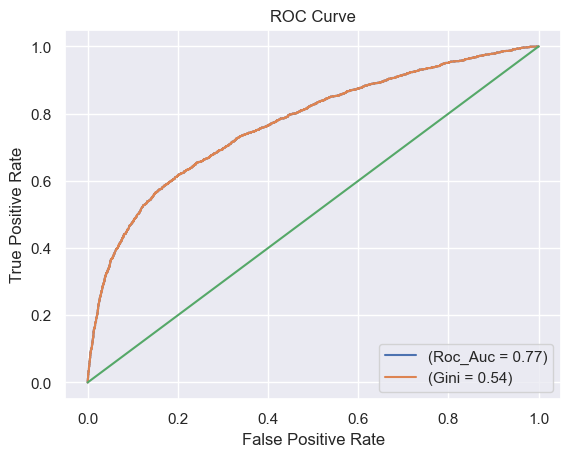

In [69]:
y_prob = best_cb_model.predict_proba(X_test_uni)[:,1]

roc_auc = roc_auc_score(y_test_uni, y_prob)
gini = (2*roc_auc_score(y_test_uni, y_prob))-1

fpr, tpr, thresholds = roc_curve(y_test_uni, y_prob)
plt.figure()

plt.plot(fpr, tpr, label='(Roc_Auc = %0.2f)' % roc_auc)
plt.plot(fpr, tpr, label='(Gini = %0.2f)' % gini)
plt.plot([0, 1], [0, 1])
plt.xlim()
plt.ylim()

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')

plt.legend(loc='lower right')
plt.show()

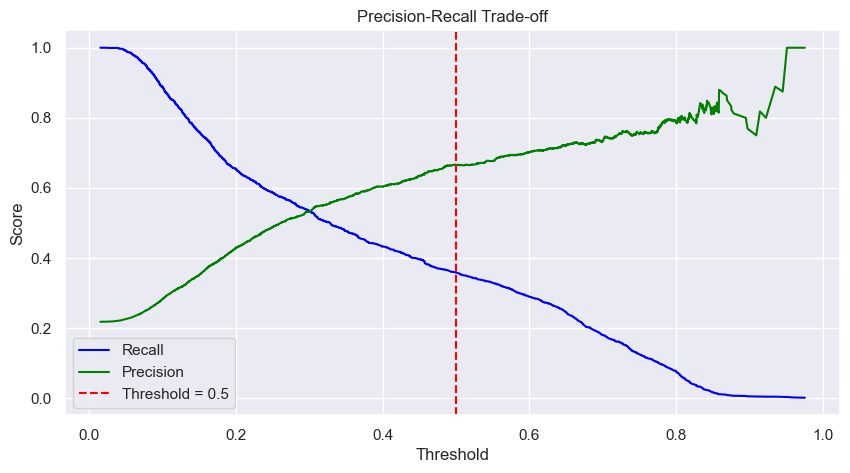

In [71]:
y_prob = best_cb_model.predict_proba(X_test_uni)[:,1]

precision, recall, thresholds = precision_recall_curve(y_test_uni, y_prob)

plt.figure(figsize=(10, 5))
plt.plot(thresholds, recall[:-1], label='Recall', color='blue')
plt.plot(thresholds, precision[:-1], label='Precision', color='green')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Precision-Recall Trade-off')
plt.axvline(x=0.5, color='red', linestyle='--', label='Threshold = 0.5')
plt.legend()
plt.grid(True)
plt.show()